In [2]:
import pandas as pd

# Read the CSV file into a DataFrame
df_energy = pd.read_csv('Dataset_feature+CN.csv')
df_energy.head()

,composition_reduced,H,Li,Be,B,C,N,O,F,Na,...,Yb.1,nsites,energy_per_atom,equilibrium_reaction_energy_per_atom,chemsys,homogeneous_poisson,material_id,CN_max,CN_min,CN_avg
0,Ac2 O3,0.0,0.0,0.0,0.0,0.0,0.0,0.600000,0.0,0.0,...,0.0,5,-34.665751,-3.634369,Ac-O,0.342,mp-11107,7,4,5.600000
1,Ac1 Br3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,8,-29.501740,-2.478844,Ac-Br,0.276,mp-27972,9,3,4.500000
2,Ac1 Br1 O1,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,...,0.0,6,-32.612308,-0.241673,Ac-Br-O,NaN,mp-30274,5,4,4.333333
3,Ac1 Cl3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,8,-24.561793,-2.788094,Ac-Cl,0.272,mp-27971,9,3,4.500000
4,Ac1 Cl1 O1,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,...,0.0,6,-30.407876,-0.232773,Ac-Cl-O,0.291,mp-30273,9,4,6.000000


In [3]:
print(df_energy.shape)

(48490, 273)


Model preparation

In [4]:
selected_columns_y = ['formation_energy_per_atom']
y = df_energy[selected_columns_y].values



excluded = ['compound possible','energy_above_hull','decomposes_to','structure','dos',
            'energy_per_atom', 'property_name','formula_anonymous', 'theoretical','universal_anisotropy','efermi',
            'formation_energy_per_atom', 'homogeneous_poisson','e_total','composition','bulk_modulus','elements',
            'symmetry', 'material_id', 'bandstructure','composition_reduced', 'band_gap', 'is_stable','vbm',
             'shear_modulus', 'n', 'cbm', 'density', 'density_atomic', 'volume','formula_pretty', 'chemsys',  'origins','equilibrium_reaction_energy_per_atom',
             'Yb.1','composition_reduced.1']

#Contains 86 elements (Without Noble elements as it does not forms compounds in normal condition)
elements = ['H','Li','Be', 'B', 'C', 'N', 'O', 'F', 'Na', 'Mg', 'Al', 'Si', 'P', 'S', 'Cl',
            'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe','Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge',
            'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd',
            'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 'I', 'Xe', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd',
            'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er','Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'W', 
            'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Ac', 'Th', 'Pa', 'U', 'Np', 'Pu' ]


phys_atts_1 = ['0-norm', '2-norm', '3-norm', '5-norm', '7-norm', '10-norm', 'MagpieData minimum Number', 'MagpieData maximum Number', 'MagpieData range Number', 'MagpieData mean Number', 'MagpieData avg_dev Number', 'MagpieData mode Number', 'MagpieData minimum MendeleevNumber', 'MagpieData maximum MendeleevNumber', 'MagpieData range MendeleevNumber', 'MagpieData mean MendeleevNumber', 'MagpieData avg_dev MendeleevNumber', 'MagpieData mode MendeleevNumber', 'MagpieData minimum AtomicWeight', 'MagpieData maximum AtomicWeight', 'MagpieData range AtomicWeight', 'MagpieData mean AtomicWeight', 'MagpieData avg_dev AtomicWeight', 'MagpieData mode AtomicWeight', 'MagpieData minimum MeltingT', 'MagpieData maximum MeltingT', 'MagpieData range MeltingT', 'MagpieData mean MeltingT', 'MagpieData avg_dev MeltingT', 'MagpieData mode MeltingT', 'MagpieData minimum Column', 'MagpieData maximum Column', 'MagpieData range Column', 'MagpieData mean Column', 'MagpieData avg_dev Column', 'MagpieData mode Column', 'MagpieData minimum Row', 'MagpieData maximum Row', 'MagpieData range Row', 'MagpieData mean Row', 'MagpieData avg_dev Row', 'MagpieData mode Row', 'MagpieData minimum CovalentRadius', 'MagpieData maximum CovalentRadius', 'MagpieData range CovalentRadius', 'MagpieData mean CovalentRadius', 'MagpieData avg_dev CovalentRadius', 'MagpieData mode CovalentRadius', 'MagpieData minimum Electronegativity', 'MagpieData maximum Electronegativity', 'MagpieData range Electronegativity', 'MagpieData mean Electronegativity', 'MagpieData avg_dev Electronegativity', 'MagpieData mode Electronegativity', 'MagpieData minimum NsValence', 'MagpieData maximum NsValence', 'MagpieData range NsValence', 'MagpieData mean NsValence', 'MagpieData avg_dev NsValence', 'MagpieData mode NsValence', 'MagpieData minimum NpValence', 'MagpieData maximum NpValence', 'MagpieData range NpValence', 'MagpieData mean NpValence', 'MagpieData avg_dev NpValence', 'MagpieData mode NpValence', 'MagpieData minimum NdValence', 'MagpieData maximum NdValence', 'MagpieData range NdValence', 'MagpieData mean NdValence', 'MagpieData avg_dev NdValence', 'MagpieData mode NdValence', 'MagpieData minimum NfValence', 'MagpieData maximum NfValence', 'MagpieData range NfValence', 'MagpieData mean NfValence', 'MagpieData avg_dev NfValence', 'MagpieData mode NfValence', 'MagpieData minimum NValence', 'MagpieData maximum NValence', 'MagpieData range NValence', 'MagpieData mean NValence', 'MagpieData avg_dev NValence', 'MagpieData mode NValence', 'MagpieData minimum NsUnfilled', 'MagpieData maximum NsUnfilled', 'MagpieData range NsUnfilled', 'MagpieData mean NsUnfilled', 'MagpieData avg_dev NsUnfilled', 'MagpieData mode NsUnfilled', 'MagpieData minimum NpUnfilled', 'MagpieData maximum NpUnfilled', 'MagpieData range NpUnfilled', 'MagpieData mean NpUnfilled', 'MagpieData avg_dev NpUnfilled', 'MagpieData mode NpUnfilled', 'MagpieData minimum NdUnfilled', 'MagpieData maximum NdUnfilled', 'MagpieData range NdUnfilled', 'MagpieData mean NdUnfilled', 'MagpieData avg_dev NdUnfilled', 'MagpieData mode NdUnfilled', 'MagpieData minimum NfUnfilled', 'MagpieData maximum NfUnfilled', 'MagpieData range NfUnfilled', 'MagpieData mean NfUnfilled', 'MagpieData avg_dev NfUnfilled', 'MagpieData mode NfUnfilled', 'MagpieData minimum NUnfilled', 'MagpieData maximum NUnfilled', 'MagpieData range NUnfilled', 'MagpieData mean NUnfilled', 'MagpieData avg_dev NUnfilled', 'MagpieData mode NUnfilled', 'MagpieData minimum GSvolume_pa', 'MagpieData maximum GSvolume_pa', 'MagpieData range GSvolume_pa', 'MagpieData mean GSvolume_pa', 'MagpieData avg_dev GSvolume_pa', 'MagpieData mode GSvolume_pa', 'MagpieData minimum GSbandgap', 'MagpieData maximum GSbandgap', 'MagpieData range GSbandgap', 'MagpieData mean GSbandgap', 'MagpieData avg_dev GSbandgap', 'MagpieData mode GSbandgap', 'MagpieData minimum GSmagmom', 'MagpieData maximum GSmagmom', 'MagpieData range GSmagmom', 'MagpieData mean GSmagmom', 'MagpieData avg_dev GSmagmom', 'MagpieData mode GSmagmom', 'MagpieData minimum SpaceGroupNumber', 'MagpieData maximum SpaceGroupNumber', 'MagpieData range SpaceGroupNumber', 'MagpieData mean SpaceGroupNumber', 'MagpieData avg_dev SpaceGroupNumber', 'MagpieData mode SpaceGroupNumber', 'avg s valence electrons', 'avg p valence electrons', 'avg d valence electrons', 'avg f valence electrons', 'nsites', 'spacegroup_number', 'nelements' ]
phys_atts_2 = ['0-norm', '2-norm', '3-norm', '5-norm', '7-norm', '10-norm', 'MagpieData minimum Number', 'MagpieData maximum Number', 'MagpieData range Number', 'MagpieData mean Number', 'MagpieData avg_dev Number', 'MagpieData mode Number', 'MagpieData minimum MendeleevNumber', 'MagpieData maximum MendeleevNumber', 'MagpieData range MendeleevNumber', 'MagpieData mean MendeleevNumber', 'MagpieData avg_dev MendeleevNumber', 'MagpieData mode MendeleevNumber', 'MagpieData minimum AtomicWeight', 'MagpieData maximum AtomicWeight', 'MagpieData range AtomicWeight', 'MagpieData mean AtomicWeight', 'MagpieData avg_dev AtomicWeight', 'MagpieData mode AtomicWeight', 'MagpieData minimum MeltingT', 'MagpieData maximum MeltingT', 'MagpieData range MeltingT', 'MagpieData mean MeltingT', 'MagpieData avg_dev MeltingT', 'MagpieData mode MeltingT', 'MagpieData minimum Column', 'MagpieData maximum Column', 'MagpieData range Column', 'MagpieData mean Column', 'MagpieData avg_dev Column', 'MagpieData mode Column', 'MagpieData minimum Row', 'MagpieData maximum Row', 'MagpieData range Row', 'MagpieData mean Row', 'MagpieData avg_dev Row', 'MagpieData mode Row', 'MagpieData minimum CovalentRadius', 'MagpieData maximum CovalentRadius', 'MagpieData range CovalentRadius', 'MagpieData mean CovalentRadius', 'MagpieData avg_dev CovalentRadius', 'MagpieData mode CovalentRadius', 'MagpieData minimum Electronegativity', 'MagpieData maximum Electronegativity', 'MagpieData range Electronegativity', 'MagpieData mean Electronegativity', 'MagpieData avg_dev Electronegativity', 'MagpieData mode Electronegativity', 'MagpieData minimum NsValence', 'MagpieData maximum NsValence', 'MagpieData range NsValence', 'MagpieData mean NsValence', 'MagpieData avg_dev NsValence', 'MagpieData mode NsValence', 'MagpieData minimum NpValence', 'MagpieData maximum NpValence', 'MagpieData range NpValence', 'MagpieData mean NpValence', 'MagpieData avg_dev NpValence', 'MagpieData mode NpValence', 'MagpieData minimum NdValence', 'MagpieData maximum NdValence', 'MagpieData range NdValence', 'MagpieData mean NdValence', 'MagpieData avg_dev NdValence', 'MagpieData mode NdValence', 'MagpieData minimum NfValence', 'MagpieData maximum NfValence', 'MagpieData range NfValence', 'MagpieData mean NfValence', 'MagpieData avg_dev NfValence', 'MagpieData mode NfValence', 'MagpieData minimum NValence', 'MagpieData maximum NValence', 'MagpieData range NValence', 'MagpieData mean NValence', 'MagpieData avg_dev NValence', 'MagpieData mode NValence', 'MagpieData minimum NsUnfilled', 'MagpieData maximum NsUnfilled', 'MagpieData range NsUnfilled', 'MagpieData mean NsUnfilled', 'MagpieData avg_dev NsUnfilled', 'MagpieData mode NsUnfilled', 'MagpieData minimum NpUnfilled', 'MagpieData maximum NpUnfilled', 'MagpieData range NpUnfilled', 'MagpieData mean NpUnfilled', 'MagpieData avg_dev NpUnfilled', 'MagpieData mode NpUnfilled', 'MagpieData minimum NdUnfilled', 'MagpieData maximum NdUnfilled', 'MagpieData range NdUnfilled', 'MagpieData mean NdUnfilled', 'MagpieData avg_dev NdUnfilled', 'MagpieData mode NdUnfilled', 'MagpieData minimum NfUnfilled', 'MagpieData maximum NfUnfilled', 'MagpieData range NfUnfilled', 'MagpieData mean NfUnfilled', 'MagpieData avg_dev NfUnfilled', 'MagpieData mode NfUnfilled', 'MagpieData minimum NUnfilled', 'MagpieData maximum NUnfilled', 'MagpieData range NUnfilled', 'MagpieData mean NUnfilled', 'MagpieData avg_dev NUnfilled', 'MagpieData mode NUnfilled', 'MagpieData minimum GSvolume_pa', 'MagpieData maximum GSvolume_pa', 'MagpieData range GSvolume_pa', 'MagpieData mean GSvolume_pa', 'MagpieData avg_dev GSvolume_pa', 'MagpieData mode GSvolume_pa', 'MagpieData minimum GSbandgap', 'MagpieData maximum GSbandgap', 'MagpieData range GSbandgap', 'MagpieData mean GSbandgap', 'MagpieData avg_dev GSbandgap', 'MagpieData mode GSbandgap', 'MagpieData minimum GSmagmom', 'MagpieData maximum GSmagmom', 'MagpieData range GSmagmom', 'MagpieData mean GSmagmom', 'MagpieData avg_dev GSmagmom', 'MagpieData mode GSmagmom', 'MagpieData minimum SpaceGroupNumber', 'MagpieData maximum SpaceGroupNumber', 'MagpieData range SpaceGroupNumber', 'MagpieData mean SpaceGroupNumber', 'MagpieData avg_dev SpaceGroupNumber', 'MagpieData mode SpaceGroupNumber', 'avg s valence electrons', 'avg p valence electrons', 'avg d valence electrons', 'avg f valence electrons', 'max ionic char', 'avg ionic char', 'nsites', 'spacegroup_number', 'nelements' ]
phys_atts_3 = ['0-norm', '2-norm', '3-norm', '5-norm', '7-norm', '10-norm', 'MagpieData minimum Number', 'MagpieData maximum Number', 'MagpieData range Number', 'MagpieData mean Number', 'MagpieData avg_dev Number', 'MagpieData mode Number', 'MagpieData minimum MendeleevNumber', 'MagpieData maximum MendeleevNumber', 'MagpieData range MendeleevNumber', 'MagpieData mean MendeleevNumber', 'MagpieData avg_dev MendeleevNumber', 'MagpieData mode MendeleevNumber', 'MagpieData minimum AtomicWeight', 'MagpieData maximum AtomicWeight', 'MagpieData range AtomicWeight', 'MagpieData mean AtomicWeight', 'MagpieData avg_dev AtomicWeight', 'MagpieData mode AtomicWeight', 'MagpieData minimum MeltingT', 'MagpieData maximum MeltingT', 'MagpieData range MeltingT', 'MagpieData mean MeltingT', 'MagpieData avg_dev MeltingT', 'MagpieData mode MeltingT', 'MagpieData minimum Column', 'MagpieData maximum Column', 'MagpieData range Column', 'MagpieData mean Column', 'MagpieData avg_dev Column', 'MagpieData mode Column', 'MagpieData minimum Row', 'MagpieData maximum Row', 'MagpieData range Row', 'MagpieData mean Row', 'MagpieData avg_dev Row', 'MagpieData mode Row', 'MagpieData minimum CovalentRadius', 'MagpieData maximum CovalentRadius', 'MagpieData range CovalentRadius', 'MagpieData mean CovalentRadius', 'MagpieData avg_dev CovalentRadius', 'MagpieData mode CovalentRadius', 'MagpieData minimum Electronegativity', 'MagpieData maximum Electronegativity', 'MagpieData range Electronegativity', 'MagpieData mean Electronegativity', 'MagpieData avg_dev Electronegativity', 'MagpieData mode Electronegativity', 'MagpieData minimum NsValence', 'MagpieData maximum NsValence', 'MagpieData range NsValence', 'MagpieData mean NsValence', 'MagpieData avg_dev NsValence', 'MagpieData mode NsValence', 'MagpieData minimum NpValence', 'MagpieData maximum NpValence', 'MagpieData range NpValence', 'MagpieData mean NpValence', 'MagpieData avg_dev NpValence', 'MagpieData mode NpValence', 'MagpieData minimum NdValence', 'MagpieData maximum NdValence', 'MagpieData range NdValence', 'MagpieData mean NdValence', 'MagpieData avg_dev NdValence', 'MagpieData mode NdValence', 'MagpieData minimum NfValence', 'MagpieData maximum NfValence', 'MagpieData range NfValence', 'MagpieData mean NfValence', 'MagpieData avg_dev NfValence', 'MagpieData mode NfValence', 'MagpieData minimum NValence', 'MagpieData maximum NValence', 'MagpieData range NValence', 'MagpieData mean NValence', 'MagpieData avg_dev NValence', 'MagpieData mode NValence', 'MagpieData minimum NsUnfilled', 'MagpieData maximum NsUnfilled', 'MagpieData range NsUnfilled', 'MagpieData mean NsUnfilled', 'MagpieData avg_dev NsUnfilled', 'MagpieData mode NsUnfilled', 'MagpieData minimum NpUnfilled', 'MagpieData maximum NpUnfilled', 'MagpieData range NpUnfilled', 'MagpieData mean NpUnfilled', 'MagpieData avg_dev NpUnfilled', 'MagpieData mode NpUnfilled', 'MagpieData minimum NdUnfilled', 'MagpieData maximum NdUnfilled', 'MagpieData range NdUnfilled', 'MagpieData mean NdUnfilled', 'MagpieData avg_dev NdUnfilled', 'MagpieData mode NdUnfilled', 'MagpieData minimum NfUnfilled', 'MagpieData maximum NfUnfilled', 'MagpieData range NfUnfilled', 'MagpieData mean NfUnfilled', 'MagpieData avg_dev NfUnfilled', 'MagpieData mode NfUnfilled', 'MagpieData minimum NUnfilled', 'MagpieData maximum NUnfilled', 'MagpieData range NUnfilled', 'MagpieData mean NUnfilled', 'MagpieData avg_dev NUnfilled', 'MagpieData mode NUnfilled', 'MagpieData minimum GSvolume_pa', 'MagpieData maximum GSvolume_pa', 'MagpieData range GSvolume_pa', 'MagpieData mean GSvolume_pa', 'MagpieData avg_dev GSvolume_pa', 'MagpieData mode GSvolume_pa', 'MagpieData minimum GSbandgap', 'MagpieData maximum GSbandgap', 'MagpieData range GSbandgap', 'MagpieData mean GSbandgap', 'MagpieData avg_dev GSbandgap', 'MagpieData mode GSbandgap', 'MagpieData minimum GSmagmom', 'MagpieData maximum GSmagmom', 'MagpieData range GSmagmom', 'MagpieData mean GSmagmom', 'MagpieData avg_dev GSmagmom', 'MagpieData mode GSmagmom', 'MagpieData minimum SpaceGroupNumber', 'MagpieData maximum SpaceGroupNumber', 'MagpieData range SpaceGroupNumber', 'MagpieData mean SpaceGroupNumber', 'MagpieData avg_dev SpaceGroupNumber', 'MagpieData mode SpaceGroupNumber', 'avg s valence electrons', 'avg p valence electrons', 'avg d valence electrons', 'avg f valence electrons', 'max ionic char', 'avg ionic char',  'CN_max', 'CN_min', 'CN_avg',  'nsites', 'spacegroup_number', 'nelements' ]


X1 = df_energy[elements+phys_atts_1]
X2 = df_energy[elements+phys_atts_2]
X3 = df_energy[elements+phys_atts_3]

X_elem = df_energy[elements]

print("There are {} possible descriptors:\n\n{}".format(X3.shape[1], X3.columns.values))

There are 236 possible descriptors:

['H' 'Li' 'Be' 'B' 'C' 'N' 'O' 'F' 'Na' 'Mg' 'Al' 'Si' 'P' 'S' 'Cl' 'K'
 'Ca' 'Sc' 'Ti' 'V' 'Cr' 'Mn' 'Fe' 'Co' 'Ni' 'Cu' 'Zn' 'Ga' 'Ge' 'As' 'Se'
 'Br' 'Kr' 'Rb' 'Sr' 'Y' 'Zr' 'Nb' 'Mo' 'Tc' 'Ru' 'Rh' 'Pd' 'Ag' 'Cd' 'In'
 'Sn' 'Sb' 'Te' 'I' 'Xe' 'Cs' 'Ba' 'La' 'Ce' 'Pr' 'Nd' 'Pm' 'Sm' 'Eu' 'Gd'
 'Tb' 'Dy' 'Ho' 'Er' 'Tm' 'Yb' 'Lu' 'Hf' 'Ta' 'W' 'Re' 'Os' 'Ir' 'Pt' 'Au'
 'Hg' 'Tl' 'Pb' 'Bi' 'Ac' 'Th' 'Pa' 'U' 'Np' 'Pu' '0-norm' '2-norm'
 '3-norm' '5-norm' '7-norm' '10-norm' 'MagpieData minimum Number'
 'MagpieData maximum Number' 'MagpieData range Number'
 'MagpieData mean Number' 'MagpieData avg_dev Number'
 'MagpieData mode Number' 'MagpieData minimum MendeleevNumber'
 'MagpieData maximum MendeleevNumber' 'MagpieData range MendeleevNumber'
 'MagpieData mean MendeleevNumber' 'MagpieData avg_dev MendeleevNumber'
 'MagpieData mode MendeleevNumber' 'MagpieData minimum AtomicWeight'
 'MagpieData maximum AtomicWeight' 'MagpieData range AtomicWeight'
 'Ma

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
# Reshape y to a 1D array
y1 = np.ravel(y)
y2 = np.ravel(y)
y3 = np.ravel(y)

# Split the data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=1)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=1)

# Train a Random Forest regression model
model_1 = RandomForestRegressor(n_estimators=300, random_state=1)
model_2 = RandomForestRegressor(n_estimators=300, random_state=1)
model_3 = RandomForestRegressor(n_estimators=300, random_state=1)

model_1.fit(X1_train, y1_train)
model_2.fit(X2_train, y2_train)
model_3.fit(X3_train, y3_train)
# Make predictions for the test set
y1_pred = model_1.predict(X1_test)
y2_pred = model_2.predict(X2_test)
y3_pred = model_3.predict(X3_test)

# Calculate the Mean Squared Error (MSE) on the test set
mse_1 = mean_squared_error(y1_test, y1_pred)
print('training R2 = ' + str(round(model_1.score(X1, y1), 3)))
print("Mean Squared Error_1:", mse_1)

mse_2 = mean_squared_error(y2_test, y2_pred)
print('training R2 = ' + str(round(model_2.score(X2, y2), 3)))
print("Mean Squared Error_2:", mse_2)

mse_3 = mean_squared_error(y3_test, y3_pred)
print('training R2 = ' + str(round(model_3.score(X3, y3), 3)))
print("Mean Squared Error_3:", mse_3)


# Calculate Mean Absolute Error (MAE)
mae_1 = mean_absolute_error(y1_test, y1_pred)
mae_2 = mean_absolute_error(y2_test, y2_pred)
mae_3 = mean_absolute_error(y3_test, y3_pred)

print("Mean Absolute Error_1:", mae_1)
print("Mean Absolute Error_2:", mae_2)
print("Mean Absolute Error_3:", mae_3)




training R2 = 0.988
Mean Squared Error_1: 0.03509869992197142
training R2 = 0.988
Mean Squared Error_2: 0.03582372628427686
training R2 = 0.99
Mean Squared Error_3: 0.031559603591587555
Mean Absolute Error_1: 0.10217604934625733
Mean Absolute Error_2: 0.10322912325036902
Mean Absolute Error_3: 0.09918031337634516


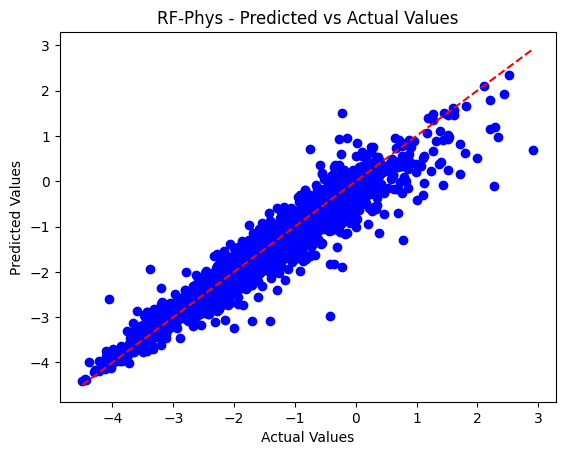

In [6]:
# Plot predicted vs actual values
plt.scatter(y3_test, y3_pred, color='blue')
plt.plot([min(y3_test), max(y3_test)], [min(y1_test), max(y1_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('RF-Phys - Predicted vs Actual Values')
plt.show()

In [8]:
import joblib  # Import joblib for saving/loading the models

# Save the models to disk
joblib.dump(model_1, 'model_1.joblib')
joblib.dump(model_2, 'model_2.joblib')
joblib.dump(model_3, 'model_3.joblib')

['model_3.joblib']

In [ ]:
# Load the models back
loaded_model_1 = joblib.load('model_1.joblib')
loaded_model_2 = joblib.load('model_2.joblib')
loaded_model_3 = joblib.load('model_3.joblib')